# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [98]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [99]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [100]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
url = f"{base_url}appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city.replace(' ', '+')}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Fetch the data from the API
        response = requests.get(city_url)
        response.raise_for_status()  # Raise an exception for 4xx and 5xx status codes

        # Parse the JSON data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | gero
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | rumoi
Processing Record 8 of Set 1 | qaqortoq
Processing Record 9 of Set 1 | alofi
Processing Record 10 of Set 1 | college
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | colonia
Processing Record 13 of Set 1 | bengkulu
Processing Record 14 of Set 1 | wailua homesteads
Processing Record 15 of Set 1 | duncan town
City not found. Skipping...
Processing Record 16 of Set 1 | constantia
Processing Record 17 of Set 1 | song cau
Processing Record 18 of Set 1 | concordia
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | pimentel
Processing Record 22 of Set

In [101]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [102]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,272.15,82,21,3.73,CL,1690434685
1,bethel,41.3712,-73.4140,297.32,78,0,3.60,US,1690434685
2,waitangi,-43.9535,-176.5597,280.83,54,91,7.32,NZ,1690434685
3,avarua,-21.2078,-159.7750,294.18,83,20,1.54,CK,1690434685
4,gero,-8.7039,121.1881,300.41,56,12,3.09,ID,1690434685


In [103]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [104]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,272.15,82,21,3.73,CL,1690434685
1,bethel,41.3712,-73.4140,297.32,78,0,3.60,US,1690434685
2,waitangi,-43.9535,-176.5597,280.83,54,91,7.32,NZ,1690434685
3,avarua,-21.2078,-159.7750,294.18,83,20,1.54,CK,1690434685
4,gero,-8.7039,121.1881,300.41,56,12,3.09,ID,1690434685


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

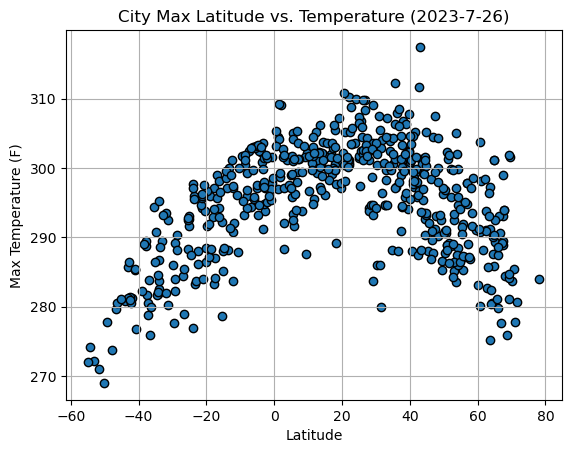

In [105]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Temperature (2023-7-26)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/mf1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

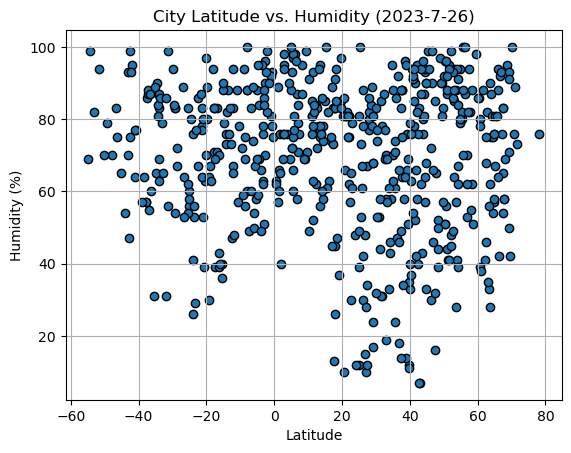

In [106]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (2023-7-26)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/mf2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

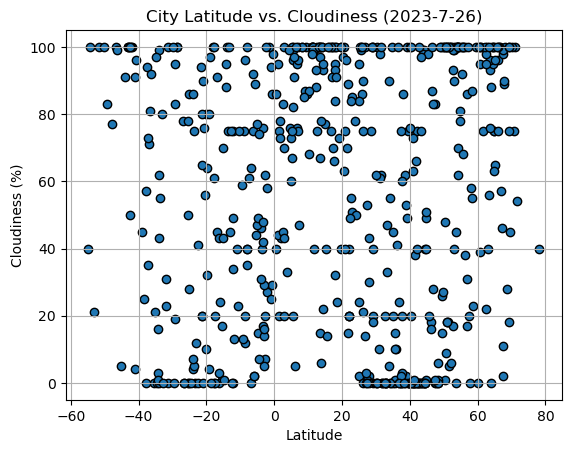

In [107]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (2023-7-26)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/mf3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

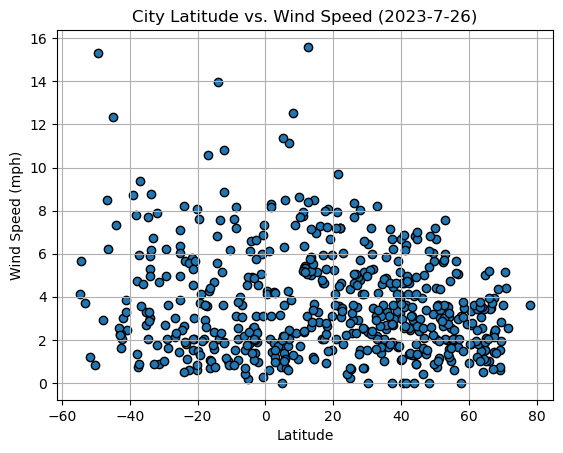

In [108]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed (2023-7-26)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/mf4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [109]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(df, x_column, y_column, x_label, y_label, title, output_filename):
    # Perform linear regression
    coefficients = np.polyfit(df[x_column], df[y_column], 1)
    slope, intercept = coefficients

    # Calculate the correlation coefficient (r value)
    r_value = np.corrcoef(df[x_column], df[y_column])[0, 1]

    # Create the regression line equation
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Create scatter plot with regression line
    plt.scatter(df[x_column], df[y_column], marker='o', edgecolors='black')
    plt.plot(df[x_column], slope * df[x_column] + intercept, color='red')

    # Incorporate the other graph properties
    plt.title(f"{title}\nCorrelation Coefficient (r) = {r_value:.2f}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)

    # Add the regression line equation to the plot
    plt.annotate(line_eq, (min(df[x_column]), min(df[y_column])), fontsize=12, color='red')

    # Save the figure
    plt.savefig(output_filename)

    # Show plot
    plt.show()

In [110]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
# Filter data for the Northern Hemisphere (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bethel,41.3712,-73.4140,297.32,78,0,3.60,US,1690434685
5,ilulissat,69.2167,-51.1000,281.16,71,18,1.54,GL,1690434685
6,rumoi,43.9344,141.6428,299.25,76,99,4.04,JP,1690434685
7,qaqortoq,60.7167,-46.0333,280.07,80,95,3.33,GL,1690434685
9,college,64.8569,-147.8028,301.14,57,75,1.54,US,1690434685


In [111]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
# Filter data for the Southern Hemisphere (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,272.15,82,21,3.73,CL,1690434685
2,waitangi,-43.9535,-176.5597,280.83,54,91,7.32,NZ,1690434685
3,avarua,-21.2078,-159.7750,294.18,83,20,1.54,CK,1690434685
4,gero,-8.7039,121.1881,300.41,56,12,3.09,ID,1690434685
8,alofi,-19.0595,-169.9187,296.03,67,97,4.11,NU,1690434685


###  Temperature vs. Latitude Linear Regression Plot

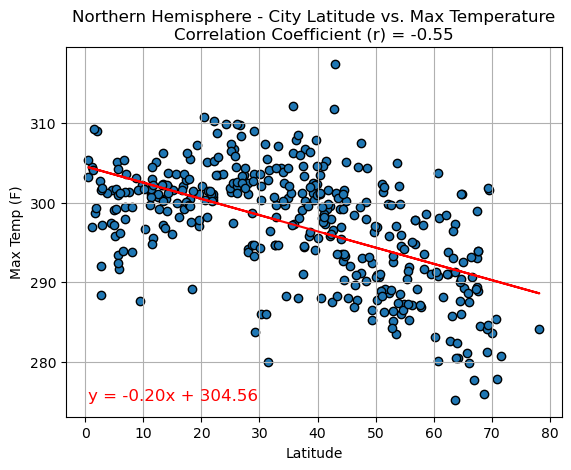

In [112]:
# Perform linear regression on Northern Hemisphere data

plot_linear_regression(northern_hemi_df, 'Lat', 'Max Temp', 'Latitude', 'Max Temp (F)', 'Northern Hemisphere - City Latitude vs. Max Temperature', 'output_data/northern_hemi_regression_maxtemp.png')

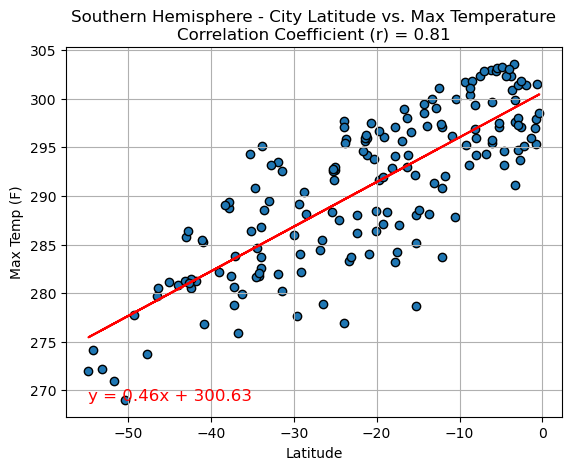

In [113]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df, 'Lat', 'Max Temp', 'Latitude', 'Max Temp (F)', 'Southern Hemisphere - City Latitude vs. Max Temperature', 'output_data/southern_hemi_regression_maxtemp.png')

**Discussion about the linear relationship:** Both hemisphere's have a stronger relationship (closer to 1.0) than the rest of the plot graphs. In addition, the linear regression lines tell us that as latitude reaches 0 (equator) the max temp reaches it's highest point.

### Humidity vs. Latitude Linear Regression Plot

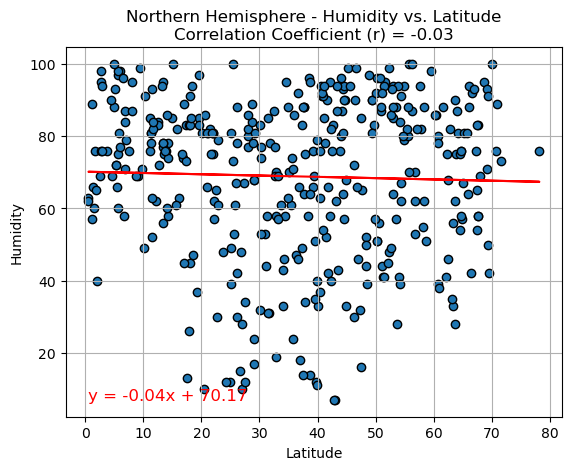

In [114]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df, 'Lat', 'Humidity', 'Latitude', 'Humidity', 'Northern Hemisphere - Humidity vs. Latitude', 'output_data/northern_hemi_regression_humidity.png')

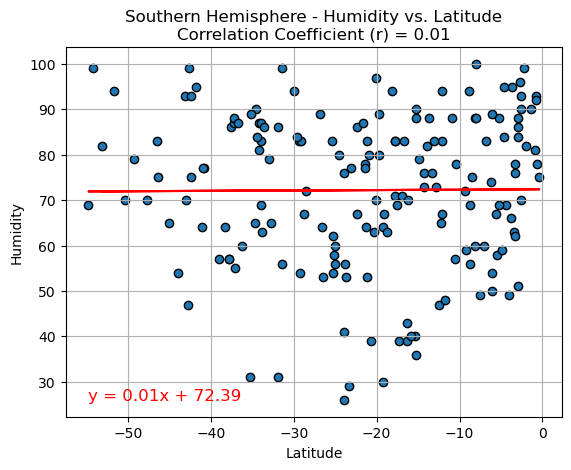

In [115]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df, 'Lat', 'Humidity', 'Latitude', 'Humidity', 'Southern Hemisphere - Humidity vs. Latitude', 'output_data/southern_hemi_regression_humidity.png')

**Discussion about the linear relationship:** The regrssion lines for humidity vs latitude tells us that the humidity peaks as we get to the equator (lat = 0). Although, the relationship is weak and humidity averages between 70-80%.

### Cloudiness vs. Latitude Linear Regression Plot

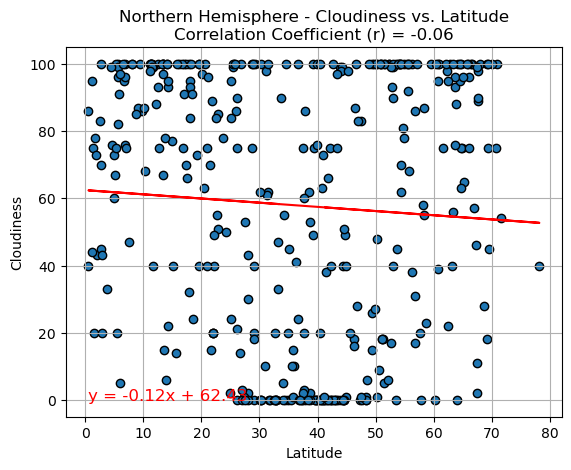

In [116]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df, 'Lat', 'Cloudiness', 'Latitude', 'Cloudiness', 'Northern Hemisphere - Cloudiness vs. Latitude', 'output_data/northern_hemi_regression_cloudiness.png')

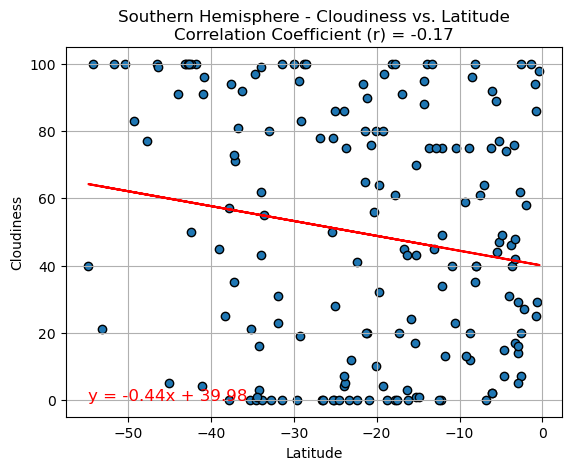

In [117]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df, 'Lat', 'Cloudiness', 'Latitude', 'Cloudiness', 'Southern Hemisphere - Cloudiness vs. Latitude', 'output_data/southern_hemi_regression_cloudiness.png')

**Discussion about the linear relationship:** The linear regression lines smooth out as we approach the northern hemisphere (lat > 0). This means in the southern hemisphere the cloudiness levels decress as we get to the euqator but in the northern hemisphere cloudiness is relatively stable around 60%

### Wind Speed vs. Latitude Linear Regression Plot

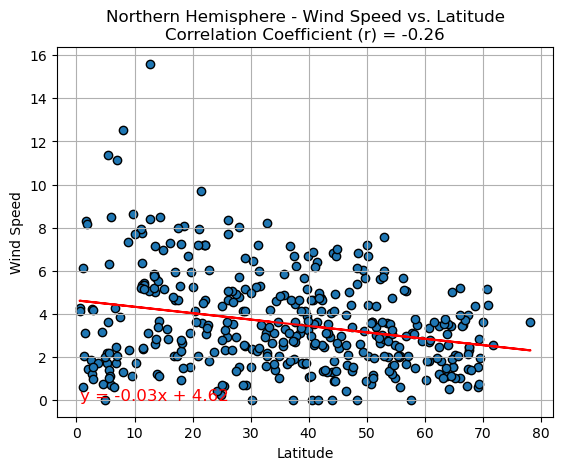

In [118]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df, 'Lat', 'Wind Speed', 'Latitude', 'Wind Speed', 'Northern Hemisphere - Wind Speed vs. Latitude', 'output_data/northern_hemi_regression_windspeed.png')

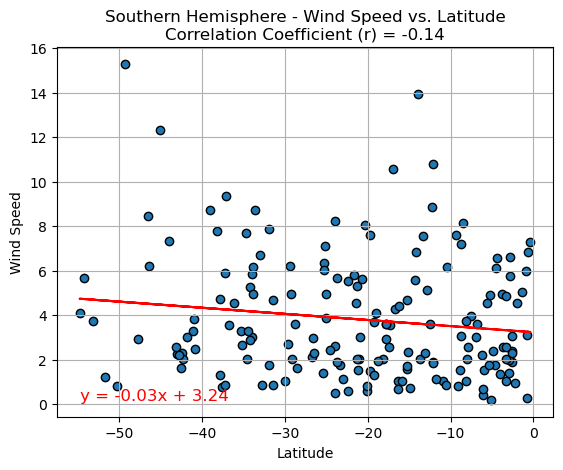

In [119]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df, 'Lat', 'Wind Speed', 'Latitude', 'Wind Speed', 'Southern Hemisphere - Wind Speed vs. Latitude', 'output_data/southern_hemi_regression_windspeed.png')

**Discussion about the linear relationship:** For both the northern and southern hemisphere's, the r-value is negative and not strong (between -1 and 0). This means that as the wind speed increases the lower (south) in longitude we get from the equater. This is the same for both hemispheres because in each plot graph the regression line trends down towards higher latitude. 